In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
aisle= pd.read_csv('C:/Users/Krithika Ganesh/Instacart/aisles.csv')
department= pd.read_csv('C:/Users/Krithika Ganesh/Instacart/departments.csv')
orders=pd.read_csv('C:/Users/Krithika Ganesh/Instacart/orders.csv')
products=pd.read_csv('C:/Users/Krithika Ganesh/Instacart/products.csv')
order_prod_prior=pd.read_csv('C:/Users/Krithika Ganesh/Instacart/order_products__prior.csv')
order_prod_train=pd.read_csv('C:/Users/Krithika Ganesh/Instacart/order_products__train.csv')

In [9]:
pd.DataFrame(aisle).head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
pd.DataFrame(department).head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
pd.DataFrame(orders).head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
pd.DataFrame(products).head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:


pd.DataFrame(order_prod_prior).head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [14]:
pd.DataFrame(order_prod_train).head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


# Data Cleaning

In [19]:
val=aisle.isnull().sum()
val
#no null values in aisle

aisle_id    0
aisle       0
dtype: int64

In [20]:
val2=department.isnull().sum()
val2
#no null values in department 

department_id    0
department       0
dtype: int64

In [21]:
val3=orders.isnull().sum()
val3

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [22]:
#calculating percentage of missing values
percent_orders=val3/orders.isnull().count()
percent_orders

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

In [23]:
missing_val_orders=pd.concat([val3,percent_orders],keys=['Total','Percentage'],axis=1)
missing_val_orders

,Total,Percentage
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000
days_since_prior_order,206209,0.060276


In [24]:
#since only 6 percent is null , eliminating null values
orders_new= orders[orders['days_since_prior_order'].notnull()]
orders_new.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [25]:
val4=products.isnull().sum()
val4
#no missing values in products

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [26]:
val5=order_prod_prior.isnull().sum()
val5
#no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [27]:
val6=order_prod_train.isnull().sum()
val6
#no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [28]:
count_hour_of_day=orders['order_hour_of_day'].value_counts()
count_hour_of_day

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

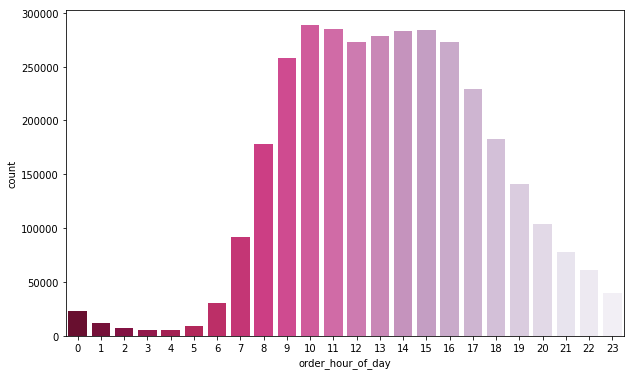

In [29]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x="order_hour_of_day", data=orders, palette='PuRd_r')
ax

In [30]:
order_day_of_week=orders['order_dow'].value_counts()
order_day_of_week

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

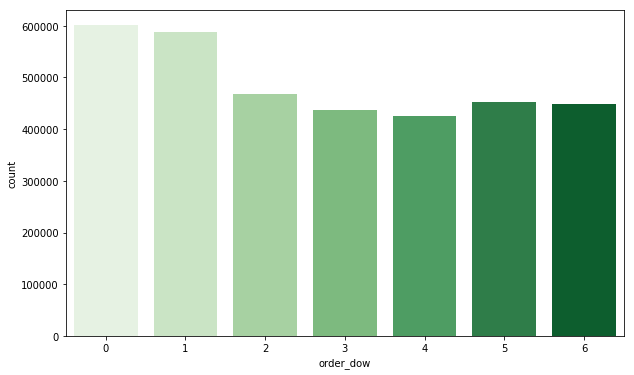

In [31]:
plt.figure(figsize=(10,6))
ax2= sns.countplot(x="order_dow", data=orders, palette='Greens')
ax

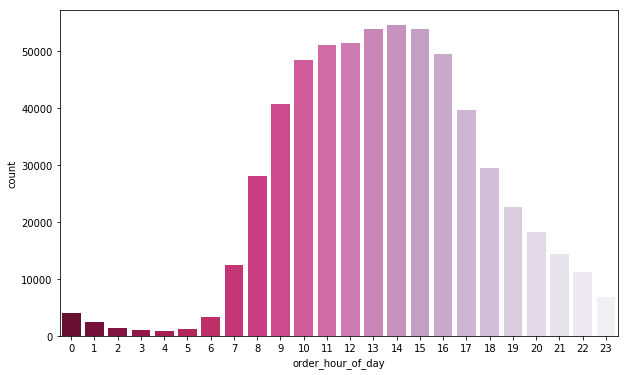

In [32]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x="order_hour_of_day", data=orders[orders['order_dow']==0], palette='PuRd_r')
ax

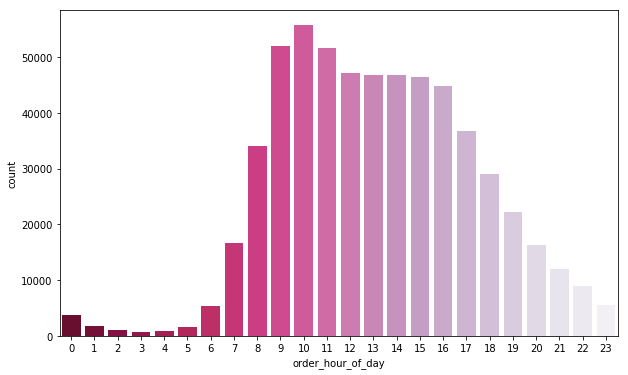

In [33]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x="order_hour_of_day", data=orders[orders['order_dow']==1], palette='PuRd_r')
ax

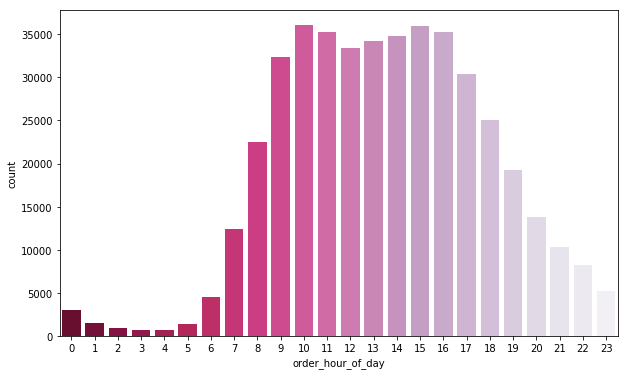

In [34]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x="order_hour_of_day", data=orders[orders['order_dow']==3], palette='PuRd_r')
ax

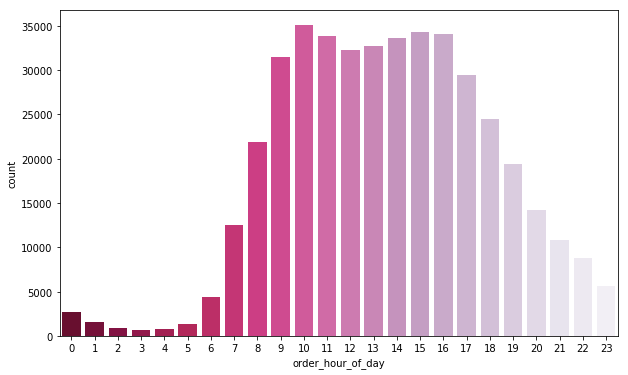

In [35]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x="order_hour_of_day", data=orders[orders['order_dow']==4], palette='PuRd_r')
ax

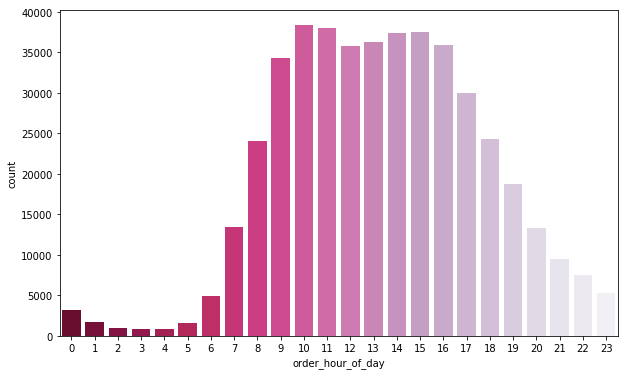

In [36]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x="order_hour_of_day", data=orders[orders['order_dow']==5], palette='PuRd_r')
ax

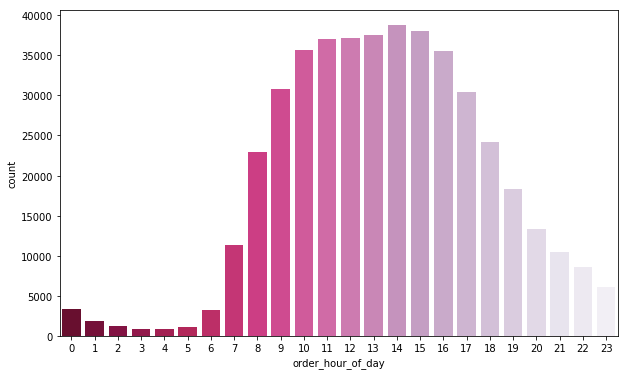

In [37]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x="order_hour_of_day", data=orders[orders['order_dow']==6], palette='PuRd_r')
ax

In [47]:
grouped_orders = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_orders

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813
5,0,5,1168
6,0,6,3329
7,0,7,12410
8,0,8,28108
9,0,9,40798


In [51]:
grouped_orders=grouped_orders.pivot("order_dow",'order_hour_of_day','order_number')
grouped_orders

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


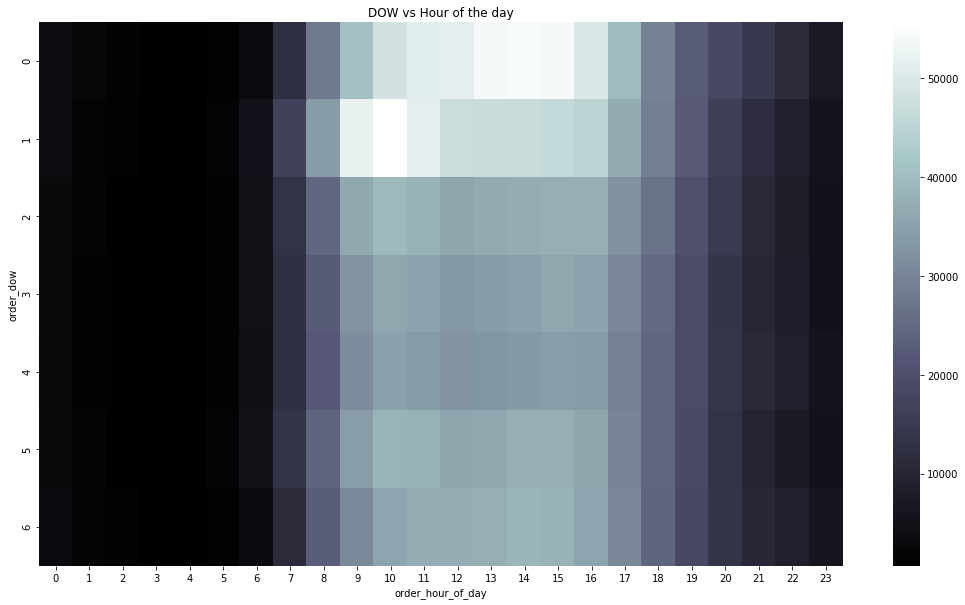

In [74]:
plt.figure(figsize=(18,10),facecolor='white')
sns.heatmap(grouped_orders,cmap='bone')
plt.title("DOW vs Hour of the day")
plt.show()

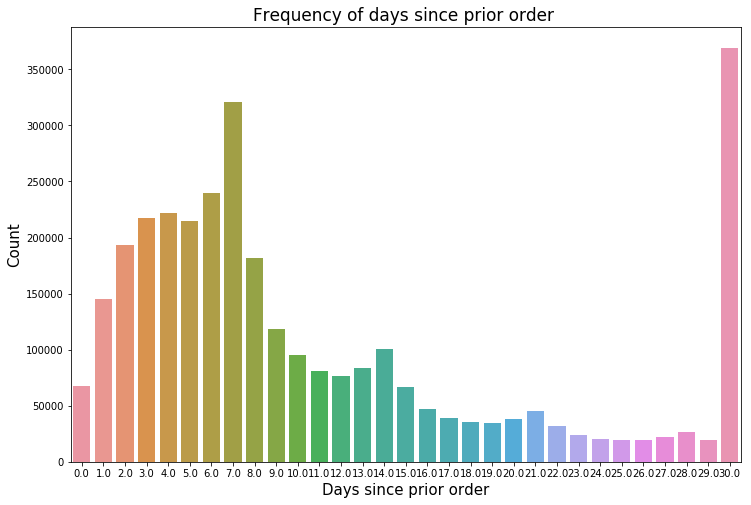

In [76]:
#frequency of orders
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Days since prior order',fontsize=15)
plt.title('Frequency of days since prior order ', fontsize=17)
plt.show()


From the above plot we can see that there's a spike in 7th day and 30th day , indicating that people tend to buy during weekends and month end also, there's a spike a 14 and 21 indicating people's tendency to buy biweekly.

In [77]:
# Finding the reorder in prior dataset
order_prod_prior.reordered.sum()/len(order_prod_prior)

0.5896974667922161

About 59% of the people reordered in the prior dataset

In [78]:
# Finding the reorder in training dataset
order_prod_train.reordered.sum()/len(order_prod_train)

0.5985944127509629

About 60% of the people reordered in training dataset

In [85]:
#getting to know the aisle and department 
order_prod_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [81]:
products_merged= pd.merge(order_prod_prior,products,on='product_id',how='left')

In [86]:
#merging aisle with products 
products_merged=pd.merge(products_merged,aisle,on='aisle_id',how='left')

In [87]:
#merging department with aisle
products_merged=pd.merge(products_merged,department,on='department_id',how='left')

In [88]:
products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [101]:
count_of_products=products_merged['product_name'].value_counts().reset_index().head(20)
count_of_products.columns=['product_name','counts']

In [99]:
count_of_products

,product_name,count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


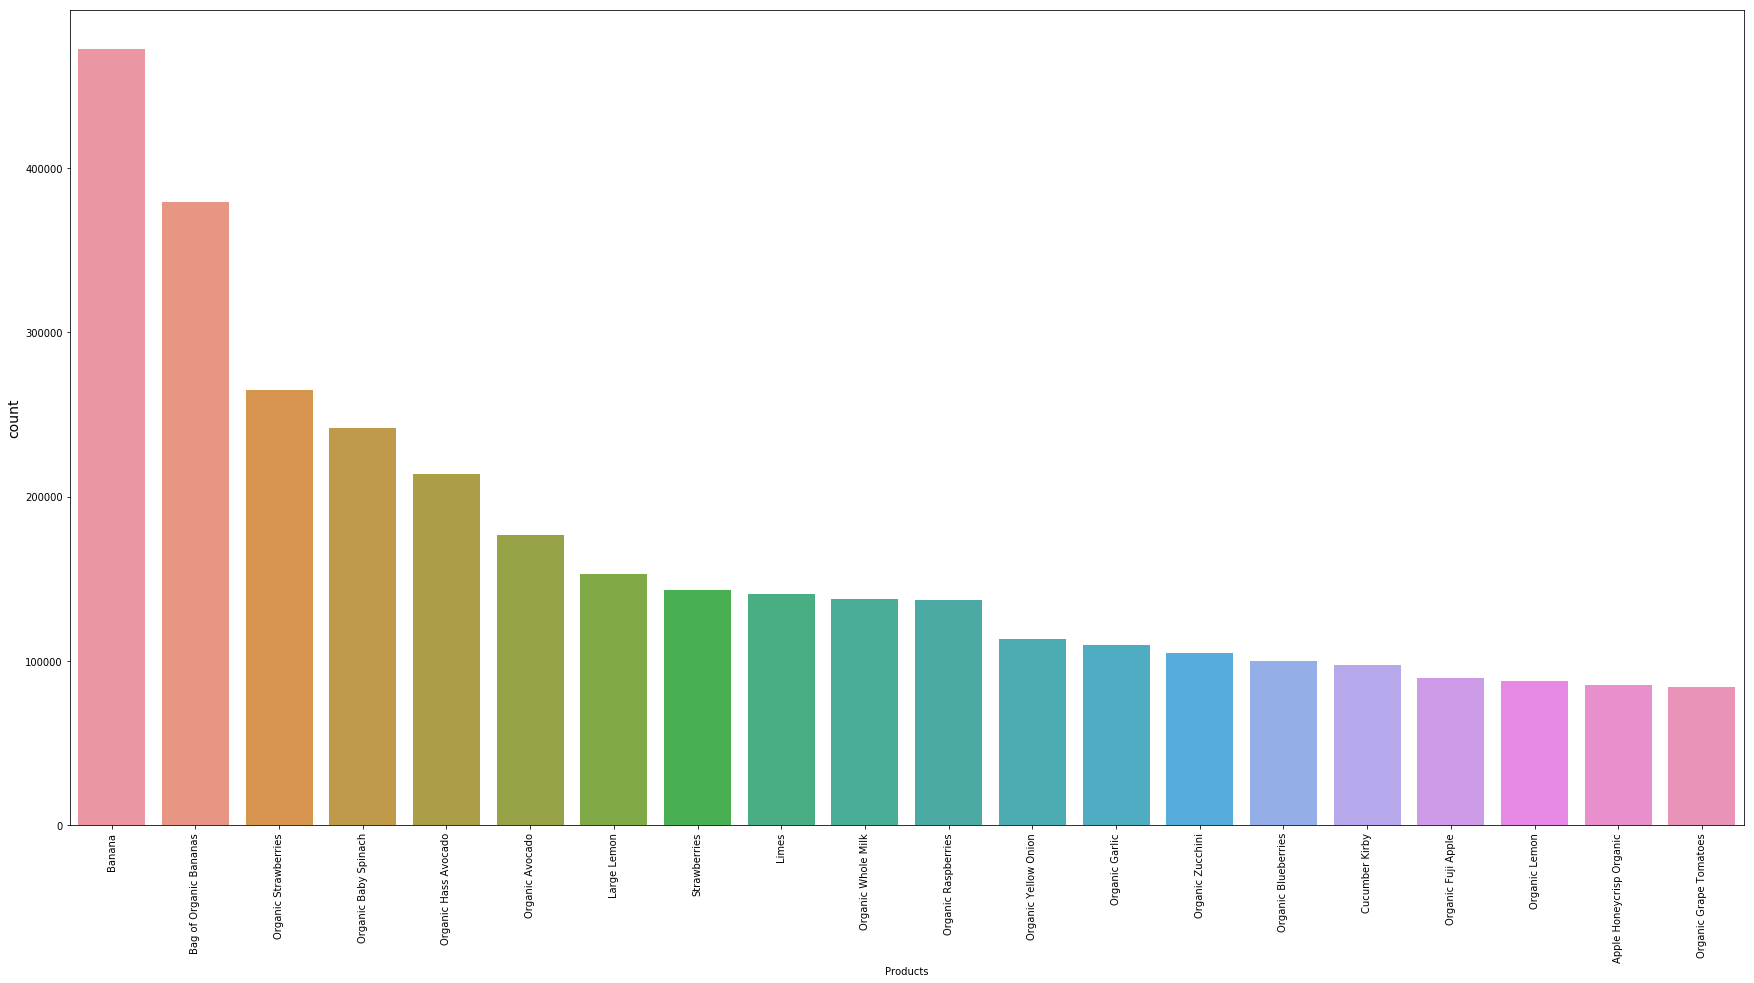

In [103]:
plt.figure(figsize=(30,15))
sns.barplot(count_of_products.product_name,count_of_products.counts)
plt.xlabel('Products',fontsize=10)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

we see that banana is the most purchased product and tomatoes are the least

In [105]:
aisle_count=products_merged['aisle'].value_counts().head(20)
aisle_count

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

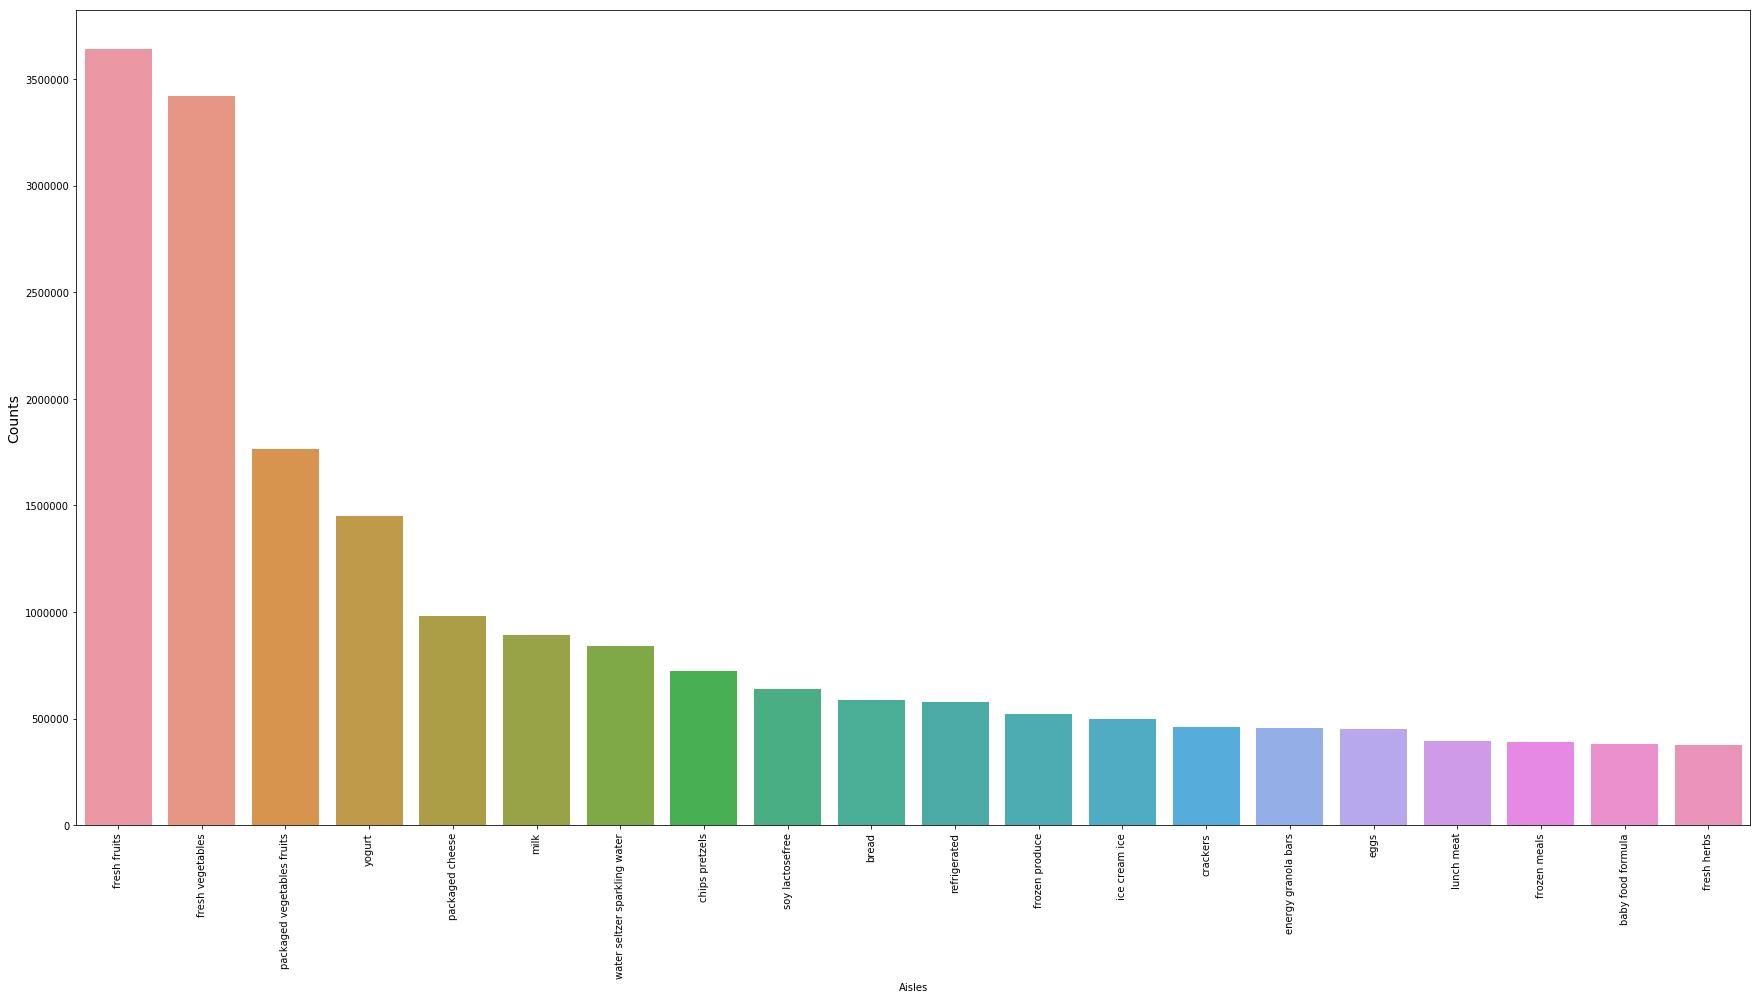

In [107]:
plt.figure(figsize=(30,15))
sns.barplot(aisle_count.index,aisle_count.values)
plt.xlabel('Aisles', fontsize=10)
plt.ylabel('Counts',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

We see that fresh fruits and vegetables are the most frequently purchased aisles

In [110]:
dept_count=products_merged['department'].value_counts().head(20)
dept_count

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
Name: department, dtype: int64

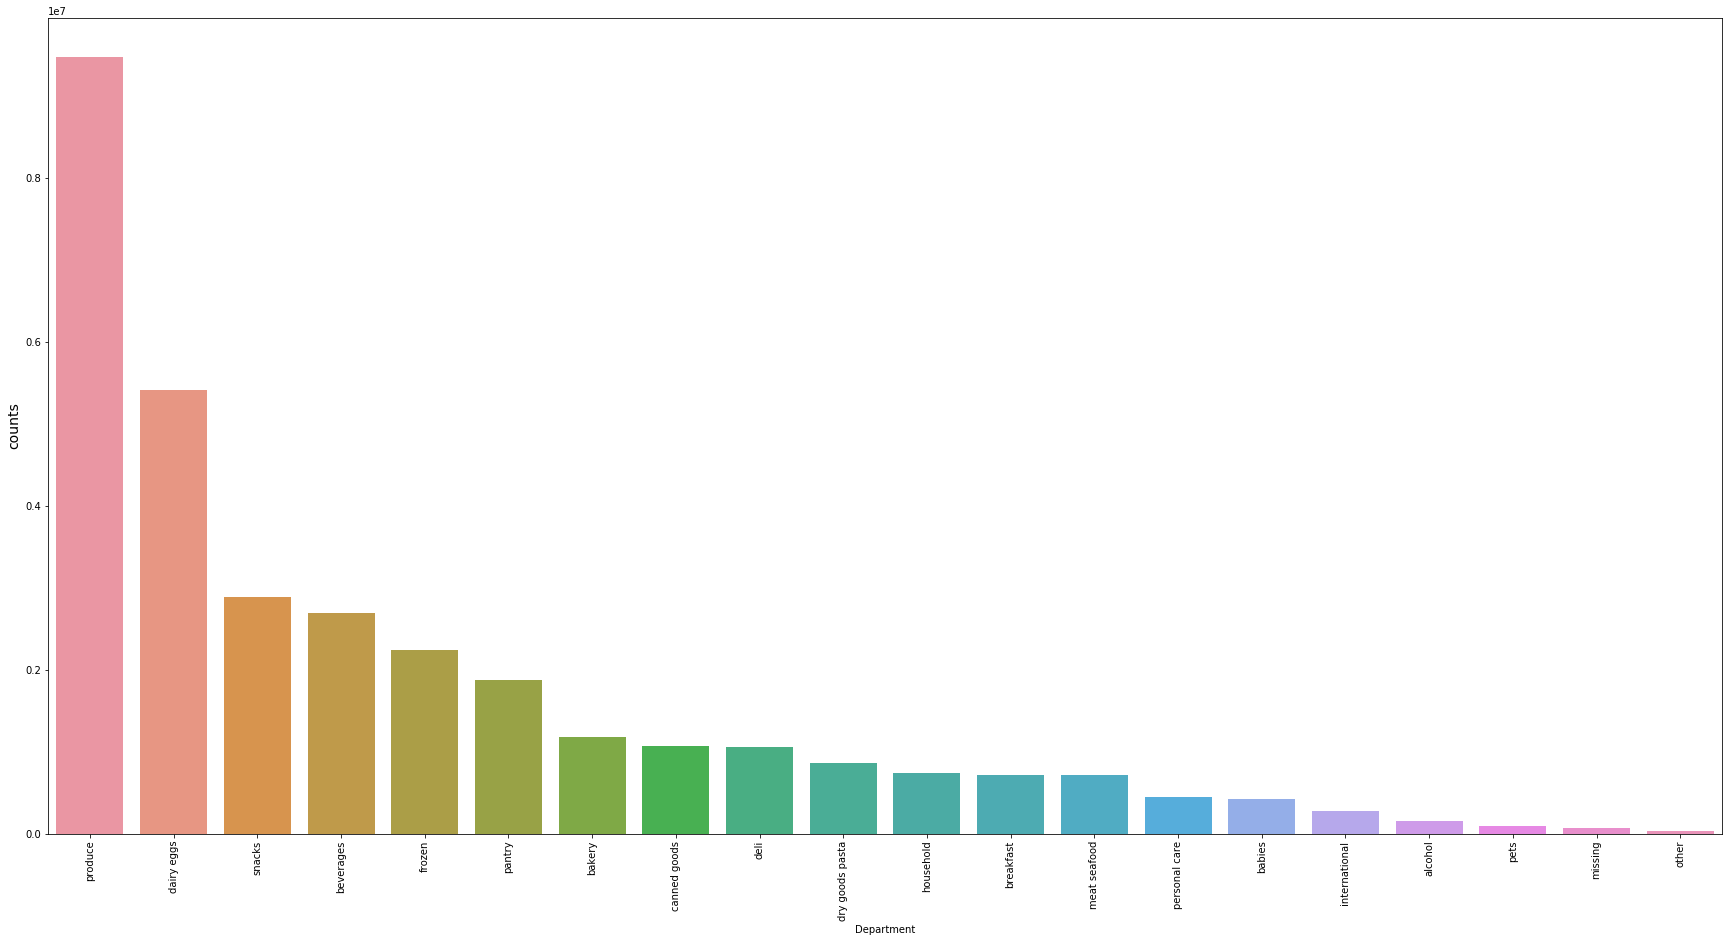

In [111]:
plt.figure(figsize=(30,15))
sns.barplot(dept_count.index,dept_count.values)
plt.xlabel('Department', fontsize=10)
plt.ylabel('counts',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

Produce is the frequently purchased department and then comes dairy eggs and snacks

In [112]:
#finding reordered 
reorders_merged= pd.merge(order_prod_prior, orders, on='order_id', how='left')
reorders_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [113]:
reordered_count=reorders_merged['reordered'].value_counts()
reordered_count

1    19126536
0    13307953
Name: reordered, dtype: int64

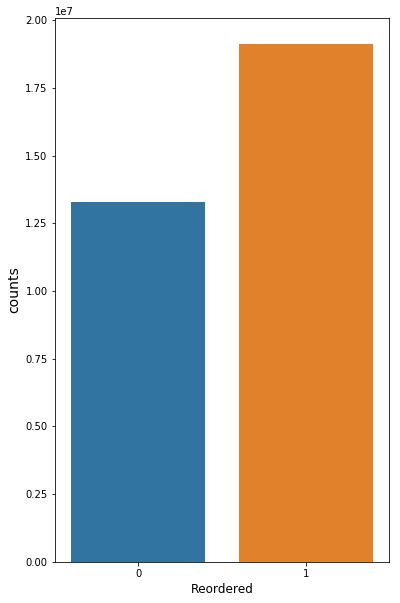

In [114]:
plt.figure(figsize=(6,10))
sns.barplot(reordered_count.index,reordered_count.values)
plt.xlabel('Reordered', fontsize=12)
plt.ylabel('counts',fontsize=14)
plt.show()


In [115]:
#reordered count against dow
grouped_reordered_dow=reorders_merged.groupby(["order_dow"])["reordered"].aggregate("count").reset_index()
grouped_reordered_dow

,order_dow,reordered
0,0,6209666
1,1,5665856
2,2,4217798
3,3,3844117
4,4,3787215
5,5,4209533
6,6,4500304


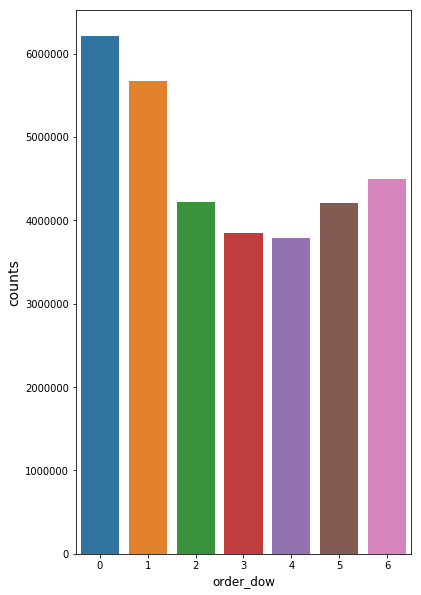

In [121]:
plt.figure(figsize=(6,10))
sns.barplot(grouped_reordered_dow.order_dow,grouped_reordered_dow.reordered)
plt.xlabel('order_dow',fontsize=12)
plt.ylabel('counts',fontsize=14)
plt.show()